In [111]:
## importing packages
#%pip install requests

import numpy as np
import pandas as pd
import requests # Make a request to a web page
import json
import re
import datetime
import time
import base64
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Subindex

In [2]:
'''
PATH_STATION_HOUR = pd.read_csv("station_hour.csv")
PATH_STATION_DAY = pd.read_csv("station_day.csv")
PATH_CITY_HOUR = pd.read_csv("city_hour.csv")
PATH_CITY_DAY = pd.read_csv("city_day.csv")
PATH_STATIONS = pd.read_csv("stations.csv")
'''

'\nPATH_STATION_HOUR = pd.read_csv("station_hour.csv")\nPATH_STATION_DAY = pd.read_csv("station_day.csv")\nPATH_CITY_HOUR = pd.read_csv("city_hour.csv")\nPATH_CITY_DAY = pd.read_csv("city_day.csv")\nPATH_STATIONS = pd.read_csv("stations.csv")\n'

In [3]:
df = pd.read_csv("station_hour.csv")
df.head()

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [4]:
df.dtypes

StationId      object
Datetime       object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [5]:
#we set parse_dates to 'datetime' to parse dates with datetime 
df = pd.read_csv("station_hour.csv", parse_dates = ["Datetime"])
df.head()

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [6]:
df.dtypes

StationId             object
Datetime      datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object

In [7]:
#sorts a data frame in Ascending or Descending order of passed Column.
df.sort_values(["StationId", "Datetime"], inplace = True)
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [8]:
df["Date"] = df.Datetime.dt.date.astype(str)
df.Datetime = df.Datetime.astype(str)

#we extract date from datetime

In [9]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Date
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN,2017-11-24
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN,2017-11-24
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN,2017-11-24
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN,2017-11-24
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN,2017-11-24


The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.

For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

For CO and O3 the maximum value in last 8-hrs is used.

Each measure is converted into a Sub-Index based on pre-defined groups.

Sometimes measures are not available due to lack of measuring or lack of required data points.

Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

In [10]:
df["PM10_24hr_avg"] = df.groupby("StationId")["PM10"].rolling(window = 24, min_periods = 16).mean().values
df["PM2.5_24hr_avg"] = df.groupby("StationId")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df["SO2_24hr_avg"] = df.groupby("StationId")["SO2"].rolling(window = 24, min_periods = 16).mean().values
df["NOx_24hr_avg"] = df.groupby("StationId")["NOx"].rolling(window = 24, min_periods = 16).mean().values
df["NH3_24hr_avg"] = df.groupby("StationId")["NH3"].rolling(window = 24, min_periods = 16).mean().values
df["CO_8hr_max"] = df.groupby("StationId")["CO"].rolling(window = 8, min_periods = 1).max().values
df["O3_8hr_max"] = df.groupby("StationId")["O3"].rolling(window = 8, min_periods = 1).max().values

## PM2.5

In [11]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

## PM10

In [12]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

## SO2 (Sulphur Dioxide)

In [13]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

## NOx (Any Nitric x-oxide)

In [14]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

## NH3 (Ammonia)

In [15]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

## CO (Carbon Monoxide)

In [16]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

## O3 (Ozone or Trioxygen)

In [17]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

AQI The final AQI is the maximum Sub-Index among the available sub-indices with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

There is no theoretical upper value of AQI but its rare to find values over 1000.

The pre-defined buckets of AQI are as follows:

00 - 50 - Good - minimal impact

51 -100 - satisfactory -  minor breating discomfort to sensitive peolpe

101-200 - Moderate - breathing discomfort to the people with lung, heart disease, children, and older people

201-300 - Poor - Breathing discomfort to people on prolonged exposure

301-400 - Very Poor - Respiratory illness to people on prolonged exposure

>401    - Respiratory effects on healthy people

In [23]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN
    

df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.nan
df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df[~df.AQI_calculated.isna()].head(3)

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,AQI_calculated,AQI_bucket_calculated
16,155.468750,112.562500,14.349219,15.366406,2.844844,5.0,125.911765,155.0,Moderate
17,158.970588,113.470588,14.755147,15.179412,2.819412,5.0,153.279412,159.0,Moderate
18,159.907407,113.703704,15.004861,14.965972,2.797500,5.0,173.411765,173.0,Moderate


In [19]:
df[~df.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()

Moderate        675060
Satisfactory    530195
Very Poor       301823
Poor            240024
Good            152113
Severe          121243
Name: AQI_bucket_calculated, dtype: int64

In [20]:
df = df[['PM2.5_SubIndex','PM10_SubIndex','SO2_SubIndex','NOx_SubIndex','NH3_SubIndex','CO_SubIndex','O3_SubIndex','AQI_calculated','AQI_bucket_calculated']]

In [21]:
df.head()

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,AQI_calculated,AQI_bucket_calculated
0,0.0,0.0,0.0,0.0,0.0,5.0,138.823529,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,5.0,138.823529,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,5.0,138.823529,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,5.0,138.823529,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,5.0,138.823529,NaN,NaN


In [24]:
df.shape

(2589083, 9)

In [25]:
df.isnull().sum()

PM2.5_SubIndex                0
PM10_SubIndex                 0
SO2_SubIndex                  0
NOx_SubIndex                  0
NH3_SubIndex                  0
CO_SubIndex                   0
O3_SubIndex                   0
AQI_calculated           558590
AQI_bucket_calculated    558590
dtype: int64

In [26]:
df=df.dropna(how='any')

In [27]:
df.isnull().sum()

PM2.5_SubIndex           0
PM10_SubIndex            0
SO2_SubIndex             0
NOx_SubIndex             0
NH3_SubIndex             0
CO_SubIndex              0
O3_SubIndex              0
AQI_calculated           0
AQI_bucket_calculated    0
dtype: int64

In [28]:
df.shape

(2030493, 9)

In [29]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-2]
y = df.AQI_calculated
x.head()

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
16,155.468750,112.562500,14.349219,15.366406,2.844844,5.0,125.911765
17,158.970588,113.470588,14.755147,15.179412,2.819412,5.0,153.279412
18,159.907407,113.703704,15.004861,14.965972,2.797500,5.0,173.411765
19,160.087719,113.824561,15.004861,15.200000,2.773947,5.0,183.529412
20,160.087719,113.824561,15.004861,15.200000,2.773947,5.0,183.529412


In [30]:
y.head()

16    155.0
17    159.0
18    173.0
19    184.0
20    184.0
Name: AQI_calculated, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg1 = lin_reg.fit(X_train, y_train)
lin_reg1

LinearRegression()

In [34]:
y_pred_reg = lin_reg.predict(X_test)

In [35]:
y_pred_reg = lin_reg.predict(X_test)

In [36]:
input_data = [26,29,11,10,1,18,45] 
prediction = lin_reg.predict([input_data])
prediction

array([43.9713807])

# Fetching Real Time Data

In [76]:
#there are two arguments that user needs to input - API Key Filter criteria

def getData(api, filters):
    url1 = "https://api.data.gov.in/resource/3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69?api-key=" + api + "&format=json&limit=500"
    criteriaAll = [[(k, re.sub(r'\s+', '%20', v)) for v in criteria[k]] for k in criteria]
    url2 = [url1 + ''.join(f'&filters[{ls}]={value}' for ls, value in p) for p in product(*criteriaAll)]
    
    pollutionDfAll = pd.DataFrame()
    for i in url2:
        response = requests.get(i, verify=False)
        response_dict = json.loads(response.text)
        pollutionDf = pd.DataFrame(response_dict['records'])
        pollutionDfAll = pd.concat([pollutionDfAll, pollutionDf])
    
    return pollutionDfAll



In [82]:
api = "579b464db66ec23bdd000001ba8edae2ab6c4142632f23f04e4e0c24 "
criteria =  { 'state':['Maharashtra'], 'city':['Nagpur', 'Kalyan', 'Nashik', 'Solapur', 'Aurangabad']} 
mydata = getData(api, criteria)
mydata
#   { 'state':['Maharashtra'], 'city':['Nagpur', 'Kalyan', 'Thane', 'Nashik', 'Solapur', 'Aurangabad']}    Aurangabad  Solapur Nashik  Thane Kalyan
#  { 'state':['Maharashtra'], 'station':['Chandrapur, Chandrapur - MPCB'],  'city':['Chandrapur']}
#  { 'state':['Maharashtra'], 'station': ['Borivali East, Mumbai - MPCB'],  'city':['Mumbai']}
#  { 'state':['Maharashtra'], 'station': ['Mahape, Navi Mumbai - MPCB'],  'city':['Navi Mumbai']}
#  { 'state':['Gujarat'],  'city':['Gandhinagar']}
#  { 'state':['Gujarat'], 'station':['Chandkheda, Ahmedabad - IITM'], 'city':['Ahmedabad']}
#  { 'state':['Madhya Pradesh'],  'city':["Dewas", 'Gwalior', 'Indore', 'Jabalpur', 'Ujjain']}
#  { 'state':['Delhi'], 'station':['Alipur, Delhi - DPCC'],'city':['Delhi']}
#  { 'state':['Delhi'], 'station':['Anand Vihar, Delhi - DPCC'],'city':['Delhi']}

#{ 'state':['Delhi'],'city':['Delhi'], 'pollutant_id': ["PM10", "PM2.5"]}

C:\Users\ASUS\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.data.gov.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.data.gov.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.data.gov.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\urllib3\connectionp

,id,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_unit
0,1257,India,Maharashtra,Nagpur,"Opp GPO Civil Lines, Nagpur - MPCB",03-10-2022 18:00:00,PM2.5,29,57,41,NA
1,1258,India,Maharashtra,Nagpur,"Opp GPO Civil Lines, Nagpur - MPCB",03-10-2022 18:00:00,PM10,34,75,49,NA
2,1259,India,Maharashtra,Nagpur,"Opp GPO Civil Lines, Nagpur - MPCB",03-10-2022 18:00:00,NO2,6,70,18,NA
3,1260,India,Maharashtra,Nagpur,"Opp GPO Civil Lines, Nagpur - MPCB",03-10-2022 18:00:00,NH3,2,4,3,NA
4,1261,India,Maharashtra,Nagpur,"Opp GPO Civil Lines, Nagpur - MPCB",03-10-2022 18:00:00,SO2,2,17,5,NA
5,1262,India,Maharashtra,Nagpur,"Opp GPO Civil Lines, Nagpur - MPCB",03-10-2022 18:00:00,CO,23,56,32,NA
6,1263,India,Maharashtra,Nagpur,"Opp GPO Civil Lines, Nagpur - MPCB",03-10-2022 18:00:00,OZONE,29,123,96,NA
0,1128,India,Maharashtra,Kalyan,"Khadakpada, Kalyan - MPCB",03-10-2022 18:00:00,PM2.5,19,148,43,NA
1,1129,India,Maharashtra,Kalyan,"Khadakpada, Kalyan - MPCB",03-10-2022 18:00:00,PM10,38,152,97,NA
2,1130,India,Maharashtra,Kalyan,"Khadakpada, Kalyan - MPCB",03-10-2022 18:00:00,NO2,9,58,24,NA


In [83]:
# we create a my_df datframe where we save raw data which is fetch from API

my_df = pd.DataFrame(data = mydata)
my_df.head()

,id,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_unit
0,1257,India,Maharashtra,Nagpur,"Opp GPO Civil Lines, Nagpur - MPCB",03-10-2022 18:00:00,PM2.5,29,57,41,NA
1,1258,India,Maharashtra,Nagpur,"Opp GPO Civil Lines, Nagpur - MPCB",03-10-2022 18:00:00,PM10,34,75,49,NA
2,1259,India,Maharashtra,Nagpur,"Opp GPO Civil Lines, Nagpur - MPCB",03-10-2022 18:00:00,NO2,6,70,18,NA
3,1260,India,Maharashtra,Nagpur,"Opp GPO Civil Lines, Nagpur - MPCB",03-10-2022 18:00:00,NH3,2,4,3,NA
4,1261,India,Maharashtra,Nagpur,"Opp GPO Civil Lines, Nagpur - MPCB",03-10-2022 18:00:00,SO2,2,17,5,NA


In [79]:
'''
# we cretae an empty dataframe my_df2

my_df2 = pd.DataFrame() #run only first time or it will  refresh
my_df2
'''

""


In [84]:
#we drop column that we dont require 
# we pivot a table to match dataframe with historical data

my_df = my_df.drop(['id','country', 'state', 'station', 'pollutant_min', 'pollutant_max', 'pollutant_unit'], axis =1)
my_df = my_df.pivot_table(index ='city', columns='pollutant_id',  ) 
my_df

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


pollutant_avg                                   
pollutant_id            CO  NH3   NO2 OZONE  PM10 PM2.5   SO2
city                                                         
Aurangabad            24.0  1.0  15.0  18.0  90.0  58.0  11.0
Kalyan                43.0  2.0  24.0   NaN  97.0  43.0  26.0
Nagpur                32.0  3.0  18.0  96.0  49.0  41.0   5.0
Nashik                20.0  1.0  10.0  45.0  31.0  33.0  10.0
Solapur               47.0  NaN  27.0  32.0  88.0  62.0  29.0

In [85]:
# We append a my_df in my_df2

my_df2 = my_df2.append(my_df)
my_df2

pollutant_avg                                   
pollutant_id            CO  NH3   NO2 OZONE  PM10 PM2.5   SO2
city                                                         
Aurangabad            24.0  1.0  15.0  18.0  90.0  58.0  11.0
Kalyan                43.0  2.0  24.0   NaN  97.0  43.0  26.0
Nagpur                32.0  3.0  18.0  96.0  49.0  41.0   5.0
Nashik                20.0  1.0  10.0  45.0  31.0  33.0  10.0
Solapur               47.0  NaN  27.0  32.0  88.0  62.0  29.0

In [86]:
# We store my_df2 in CSV format

my_df2.to_csv("C://Users//ASUS//DBDA Python//AQI//03_10_2022.csv")

In [87]:
my_df2.shape

(5, 7)

# Real Time Processing and Model

In [52]:
real_df = pd.read_csv('Real_time_data.csv')
real_df.head()

,city,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
0,Nagpur,36.0,3.0,18.0,39.0,46.0,43.0,5.0
1,Aurangabad,31.0,1.0,14.0,5.0,91.0,43.0,5.0
2,Pune,27.0,NaN,35.0,13.0,61.0,96.0,33.0
3,Nagpur,33.0,3.0,18.0,35.0,46.0,42.0,5.0
4,Aurangabad,26.0,1.0,14.0,5.0,91.0,42.0,6.0


In [53]:
real_df.shape

(1119, 8)

In [54]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    1119 non-null   object 
 1   CO      1094 non-null   float64
 2   NH3     1028 non-null   float64
 3   NO2     1106 non-null   float64
 4   OZONE   1074 non-null   float64
 5   PM10    1117 non-null   float64
 6   PM2.5   1105 non-null   float64
 7   SO2     1048 non-null   float64
dtypes: float64(7), object(1)
memory usage: 70.1+ KB


## Data Preprocessing

In [55]:
#Find out how many cities are there in dataset
real_df.city.unique()

array(['Nagpur', 'Aurangabad', 'Pune', 'Solapur', 'Gandhinagar',
       'Chandrapur', 'Mumbai', 'Dewas', 'Gwalior', 'Indore', 'Jabalpur',
       'Ujjain', 'Ahmedabad', 'Nashik', 'Delhi', 'Thane', 'Navi Mumbai',
       'Kalyan'], dtype=object)

In [56]:
#is there any null values present?
real_df.isnull().sum()

city      0
CO       25
NH3      91
NO2      13
OZONE    45
PM10      2
PM2.5    14
SO2      71
dtype: int64

In [57]:
#fill all null values with the median

real_df["CO"].fillna((real_df["CO"].median()),inplace=True)
real_df["NH3"].fillna((real_df["NH3"].median()),inplace=True)
real_df["NO2"].fillna((real_df["NO2"].median()),inplace=True)
real_df["OZONE"].fillna((real_df["OZONE"].median()),inplace=True)
real_df["PM10"].fillna((real_df["PM10"].median()),inplace=True)
real_df["PM2.5"].fillna((real_df["PM2.5"].median()),inplace=True)
real_df["SO2"].fillna((real_df["SO2"].median()),inplace=True)#

In [58]:
#Check weather a null value present or not
real_df.isnull().sum()

city     0
CO       0
NH3      0
NO2      0
OZONE    0
PM10     0
PM2.5    0
SO2      0
dtype: int64

## Explatory Data Analysis

<AxesSubplot:xlabel='city'>

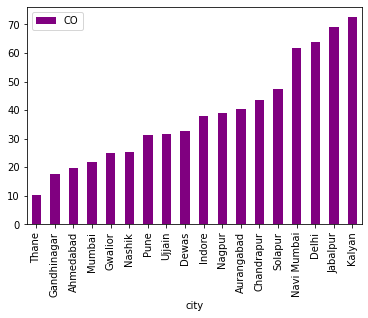

In [59]:
real_df[['CO','city']].groupby(["city"]).mean().sort_values(by='CO').plot.bar(color='Purple')

Kalyan is most polluted city in trms of Carbon Monoxide

<AxesSubplot:xlabel='city'>

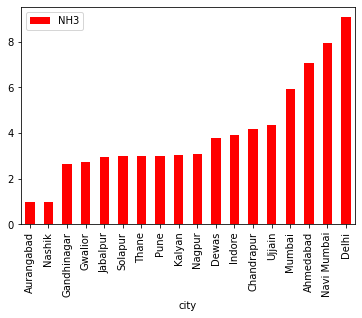

In [60]:
real_df[['NH3','city']].groupby(["city"]).mean().sort_values(by='NH3').plot.bar(color='Red')

Delhi is most polluted city in trms of Ammonia(NH3)

<AxesSubplot:xlabel='city'>

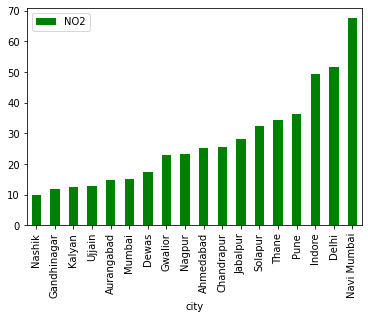

In [61]:
real_df[['NO2','city']].groupby(["city"]).mean().sort_values(by='NO2').plot.bar(color='Green')

Navi Mumbai is most polluted city in terms of Nitrogen Oxide(NO2)

<AxesSubplot:xlabel='city'>

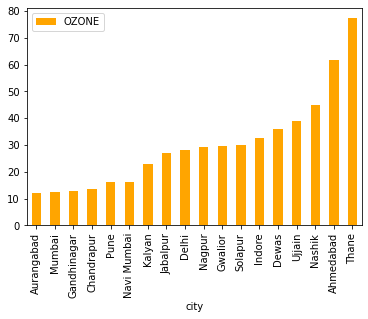

In [62]:
real_df[['OZONE','city']].groupby(["city"]).mean().sort_values(by='OZONE').plot.bar(color='Orange')

Thane is most polluted city in terms of Ozone(O3)

<AxesSubplot:xlabel='city'>

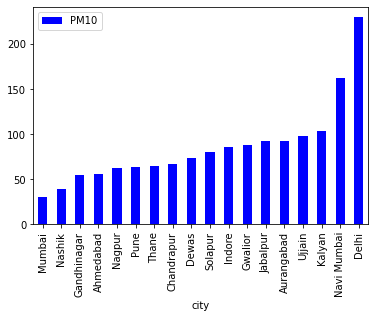

In [63]:
real_df[['PM10','city']].groupby(["city"]).mean().sort_values(by='PM10').plot.bar(color='Blue')

Delhi is most polluted city in terms of PM10

<AxesSubplot:xlabel='city'>

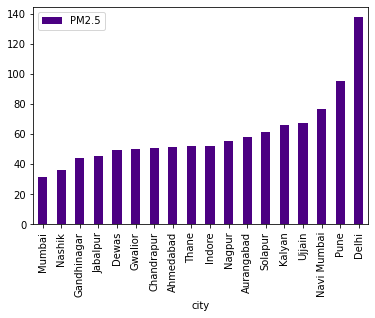

In [64]:
real_df[['PM2.5','city']].groupby(["city"]).mean().sort_values(by='PM2.5').plot.bar(color='Indigo')

Delhi is most polluted city in terms of PM2.5

<AxesSubplot:xlabel='city'>

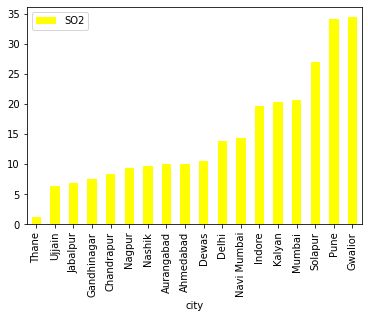

In [65]:
    real_df[['SO2','city']].groupby(["city"]).mean().sort_values(by='SO2').plot.bar(color='Yellow')

Gwalior is most polluted city in terms of Sulphur Dioxide(SO2)

In [66]:
#Function to calculate AQI Value

def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN



real_df["AQI_calculated"] = round(real_df[["CO", "NH3", "NO2", "OZONE",
                                 "PM10", "PM2.5", "SO2"]].max(axis = 1))


real_df["AQI_bucket_calculated"] = real_df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
real_df[~real_df.AQI_calculated.isna()].head(5)


,city,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2,AQI_calculated,AQI_bucket_calculated
0,Nagpur,36.0,3.0,18.0,39.0,46.0,43.0,5.0,46.0,Good
1,Aurangabad,31.0,1.0,14.0,5.0,91.0,43.0,5.0,91.0,Satisfactory
2,Pune,27.0,3.0,35.0,13.0,61.0,96.0,33.0,96.0,Satisfactory
3,Nagpur,33.0,3.0,18.0,35.0,46.0,42.0,5.0,46.0,Good
4,Aurangabad,26.0,1.0,14.0,5.0,91.0,42.0,6.0,91.0,Satisfactory


## Model

In [67]:
# we split arrays or matrices into random train and test subsets using train_test_split
# we divide our data in x and y variable
# x = dependent variable
# y = independent variable

from sklearn.model_selection import train_test_split
x = real_df.iloc[:,1:-2]
y = real_df.AQI_calculated
x.head()

,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
0,36.0,3.0,18.0,39.0,46.0,43.0,5.0
1,31.0,1.0,14.0,5.0,91.0,43.0,5.0
2,27.0,3.0,35.0,13.0,61.0,96.0,33.0
3,33.0,3.0,18.0,35.0,46.0,42.0,5.0
4,26.0,1.0,14.0,5.0,91.0,42.0,6.0


In [68]:
y.head()

0    46.0
1    91.0
2    96.0
3    46.0
4    91.0
Name: AQI_calculated, dtype: float64

In [70]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


## Linear Reression

In [71]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg1 = reg.fit(X_train, y_train)

In [72]:
y_pred_reg = reg1.predict(X_test)

### Accuracy

In [73]:
errors = abs(y_pred_reg - y_test) #returns the absolute value without considering its sign
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.82 %.


### Mean Absolute Error

In [88]:
from sklearn.metrics import mean_absolute_error

print(" Mean Absolute Error:\n")
mean_absolute_error(y_test, y_pred_reg)

 Mean Absolute Error:



3.2623498842836947

Mean Absolute Error: - Average absolute difference between the observed and predicted values.

### Mean Squared Error

In [89]:
from sklearn.metrics import mean_squared_error
  
# Calculation of Mean Squared Error (MSE)

print(" Mean Squared Error:\n")
mean_squared_error(y_test,y_pred_reg)

 Mean Squared Error:



33.90180243604163

Mean Squared Error: - Average squared difference between the observed and predicted values.

### Root Mean Square Error

In [90]:
from sklearn.metrics import mean_squared_error
import math
 
MSE = mean_squared_error(y_test, y_pred_reg)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

5.822525434555149


Root Mean Square Error - It is root of MSE

#### This above three are the loss function which tells us about how much error is present in the model

### R-Squared (R²) score

In [91]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_reg)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9926047045418168


R-Squared R² known as the coefficient of determination or goodness of fit,

sum of squared of error of regression line - sum of squared of error of mean line We compare our mean line with our regression line We consider mean line is a worst perform line It is 1 when regression line is accurateely predict which is good

In [92]:
import statsmodels.api as sm

Summ = sm.OLS(y_train,(sm.add_constant(X_train)))
Summ.fit().summary()

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AQI_calculated   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.855e+04
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:05:09   Log-Likelihood:                -2802.4
No. Observations:                 895   AIC:                             5621.
Df Residuals:                     887   BIC:                             5659.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3223      0.597     -5.561      0.000      -4.495      -2.150
CO            -0.0027      0.010     -0.282      0.778      -0.022       0.016
NH3            0.1090      0.061      1.776      0.076      -0.011       0.229
NO2            0.0578      0.012      4.998      0.000       0.035       0.080
OZONE          0.1054      0.010     10.397      0.000       0.085       0.125
PM10           0.9294      0.006    159.792      0.000       0.918       0.941
PM2.5          0.1068      0.010     10.626      0.000       0.087       0.127
SO2            0.0162      0.024      0.682      0.495      -0.030       0.063
==============================================================================
Omnibus:                     1016.275   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103760.781
Skew:                           5.451   Prob(JB):                         0.00
Kurtosis:                      54.610   Cond. No.                         704.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor()
random_model1 = random_model.fit(X_train,y_train)

In [94]:
random_model_pred = random_model1.predict(X_test)

### Accuracy

In [95]:
errors = abs(random_model_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.22 %.


## Mean Absolute Error

In [96]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, random_model_pred)

0.674196428571429

### Mean Squared Error

In [97]:
from sklearn.metrics import mean_squared_error
  
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_test,random_model_pred)

3.205676785714288

### Root Mean Squared Error

In [98]:
from sklearn.metrics import mean_squared_error
import math
 
MSE = mean_squared_error(y_test, random_model_pred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.7904403887631355


### R2 Score

In [99]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, random_model_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9993007178005204


## Support Vector Regressor

In [100]:
from sklearn.svm import SVR
scv_reg  = SVR(kernel = 'rbf')
scv_reg1 = scv_reg .fit(X_train,y_train)

In [101]:
scv_reg_pred = scv_reg1.predict(X_test)

In [102]:
errors = abs(scv_reg_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 89.2 %.


### Mean Absolute Error

In [106]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, scv_reg_pred)

13.874269410263413

### Mean Squared Error

In [108]:
from sklearn.metrics import mean_squared_error
  
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_test,scv_reg_pred)

2388.055837501633

### Root Mean Squared Error 

In [109]:
from sklearn.metrics import mean_squared_error
import math
 
MSE = mean_squared_error(y_test, scv_reg_pred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

48.867738207345276


### R2 Score

In [103]:
r2 = r2_score(y_test, scv_reg_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.479072579628142


## Prediction on Random Forest

In [110]:
input_data = [65,13,70,45,316,93,23]
prediction = random_model.predict([input_data])
print(prediction)
if prediction <=50:
    print("Good")
elif prediction <=100:
    print('Satisfactory')
elif prediction <=200:
    print('Moderate')
elif prediction <=300:
    print('Poor')
elif prediction <=400:
    print('Very Poor')
elif prediction >400:
    print('Severe')

[312.05]
Very Poor


## Saving the train model

In [112]:
filename = 'trained_model.sav'
pickle.dump(random_model, open(filename, 'wb'))

## Loading the save model

In [113]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

# Frontend

[22.1]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

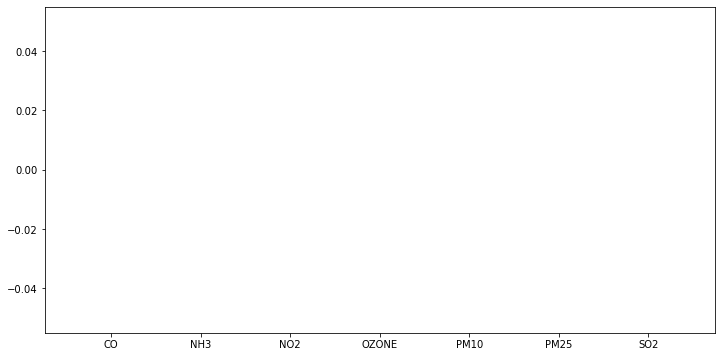

In [119]:

'''
import numpy as np
import pickle
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt


#loading the saved model
loaded_model = pickle.load(open(r'C:\Users\ASUS\DBDA Python\AQI\trained_model.sav','rb')) #called to de-serialize a data stream.

#creatng a function for prediction
def aqi_prediction(input_data):
    
    prediction = loaded_model.predict([input_data])
    print(prediction)
    if prediction <=50:
        return "Good"
    elif prediction <=100:
        return 'Satisfactory'
    elif prediction <=200:
        return 'Moderate'
    elif prediction <=300:
        return 'Poor'
    elif prediction <=400:
        return 'Very Poor'
    elif prediction >400:
        return 'Severe'

st.title("Air Quality Index") # Display text in title formatting.

CO =  st.number_input('Value of CO2',0) #Display a numeric input widget.
NH3 =  st.number_input('Value of NH3',0)
NO2 =  st.number_input('Value of NO2',0)
OZONE=  st.number_input('Value of OZONE',0)
PM10 =  st.number_input('Value of PM10',0)
PM25 =  st.number_input('Value of PM2.5',0)
SO2 =  st.number_input('Value of SO2',0)

input_data = [CO,NH3,NO2,OZONE,PM10,PM25,SO2]
    
st.write(aqi_prediction(input_data)) #used to display information into your app
prediction = loaded_model.predict([input_data])
st.write(prediction)


st.subheader('Pollutants of your City')
df=pd.DataFrame(data=input_data,columns=['Value'])
df['Pollutants']=['CO','NH3','NO2','OZONE','PM10','PM25','SO2']
fig=plt.figure(figsize=(12,6))
plt.bar(df.Pollutants,df.Value,data=df)
st.pyplot(fig)


#we require a python file to run frontend hence we create a seperate file for that
'''


